In [1]:
#Importing Numpy, Pandas, Maltplotlib, Scipy, XLRD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import sys
!conda install --yes --prefix {sys.prefix} xlrd
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

Solving environment: ...working... done

# All requested packages already installed.



#Task 1

In [2]:
#LOading the file
cmc = pd.read_csv('cmc_data.csv')

In [3]:
#Checking the file
print("First 5 lines")
print(cmc.head(5))
print("Last 5 lines")
print(cmc.tail(5))
print("Randomly select 10 lines")
print(cmc.sample(10, random_state=3))
print("Shape")
print(cmc.shape)
print("Info")
print(cmc.info())
print(cmc.isna().sum())
for col in cmc:
    print(cmc[col].unique())
print("Description")
print(cmc.describe(include='all'))

First 5 lines
   Wife_Age  Wife_Education  Husband_Education  Number_Of_Children  \
0        24               2                  3                   3   
1        45               1                  3                  10   
2        43               2                  3                   7   
3        42               3                  2                   9   
4        36               3                  3                   8   

   Wife_Religion  Wife_Working  Husband_Occupation  Standard_of_Living  \
0              1             1                   2                   3   
1              1             1                   3                   4   
2              1             1                   3                   4   
3              1             1                   3                   3   
4              1             1                   3                   2   

   Media_Exposure  Contraceptive_Method  
0               0                     1  
1               0                   

In [4]:
#Looking at the data
# Mean value 
print(cmc.mean())
print('*'*80)
# Max and min value 
print('Max values')
print(cmc.max())
print('*'*80)
print('Min values')
print(cmc.min())

Wife_Age                32.538357
Wife_Education           2.958588
Husband_Education        3.429735
Number_Of_Children       3.261371
Wife_Religion            0.850645
Wife_Working             0.749491
Husband_Occupation       2.137814
Standard_of_Living       3.133741
Media_Exposure           0.073999
Contraceptive_Method     1.919891
dtype: float64
********************************************************************************
Max values
Wife_Age                49
Wife_Education           4
Husband_Education        4
Number_Of_Children      16
Wife_Religion            1
Wife_Working             1
Husband_Occupation       4
Standard_of_Living       4
Media_Exposure           1
Contraceptive_Method     3
dtype: int64
********************************************************************************
Min values
Wife_Age                16
Wife_Education           1
Husband_Education        1
Number_Of_Children       0
Wife_Religion            0
Wife_Working             0
Husband_Occupati

#Task 2

#Task 2.1

32.5383570944
8.22724475547
49
16


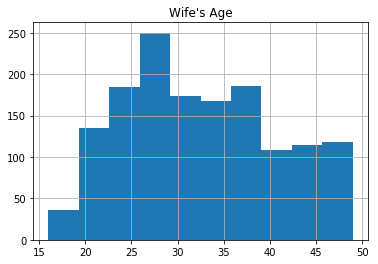

In [5]:
#1 Wife's Age
print(cmc.Wife_Age.mean())
print(cmc.Wife_Age.std())
print(cmc.Wife_Age.max())
print(cmc.Wife_Age.min())
cmc['Wife_Age'].hist(bins=10)
plt.title("Wife's Age")
plt.show()

Percentage of women in each group:
Group 1
10.3190767142
Group 2
22.6748133062
Group 3
27.8343516633
Group 4
39.1717583164


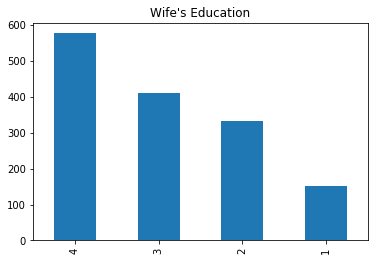

In [6]:
#2 Wife's Education
print("Percentage of women in each group:")
print("Group 1")
print(len(cmc[cmc['Wife_Education']==1])/1473.0 * 100)
print("Group 2")
print(len(cmc[cmc['Wife_Education']==2])/1473.0 * 100)
print("Group 3")
print(len(cmc[cmc['Wife_Education']==3])/1473.0 * 100)
print("Group 4")
print(len(cmc[cmc['Wife_Education']==4])/1473.0 * 100)
cmc['Wife_Education'].value_counts().plot(kind='bar')
plt.title("Wife's Education")
plt.show()

Percentage of husbands in each group:
Group 1
2.98710115411
Group 2
12.0841819416
Group 3
23.8968092329
Group 4
61.0319076714


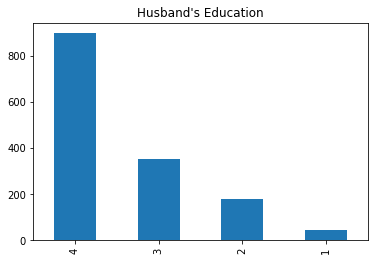

In [7]:
#3 Husband's Education
print("Percentage of husbands in each group:")
print("Group 1")
print(len(cmc[cmc['Husband_Education']==1])/1473.0 * 100)
print("Group 2")
print(len(cmc[cmc['Husband_Education']==2])/1473.0 * 100)
print("Group 3")
print(len(cmc[cmc['Husband_Education']==3])/1473.0 * 100)
print("Group 4")
print(len(cmc[cmc['Husband_Education']==4])/1473.0 * 100)
cmc['Husband_Education'].value_counts().plot(kind='bar')
plt.title("Husband's Education")
plt.show()

3.26137135098
2.35854886269
16
0


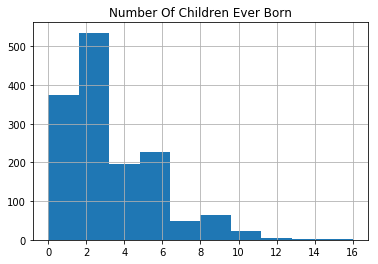

In [8]:
#4 Number of children ever born
print(cmc.Number_Of_Children.mean())
print(cmc.Number_Of_Children.std())
print(cmc.Number_Of_Children.max())
print(cmc.Number_Of_Children.min())
cmc['Number_Of_Children'].hist(bins=10)
plt.title("Number Of Children Ever Born")
plt.show()

Percentage of women in each group:
0 = Non-Muslim
14.9355057705
1 = Muslim
85.0644942295


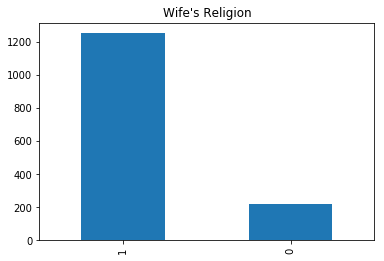

In [9]:
#5 Wife's Religion
print("Percentage of women in each group:")
print("0 = Non-Muslim")
print(len(cmc[cmc['Wife_Religion']==0])/1473.0 * 100)
print("1 = Muslim")
print(len(cmc[cmc['Wife_Religion']==1])/1473.0 * 100)
cmc['Wife_Religion'].value_counts().plot(kind='bar')
plt.title("Wife's Religion")
plt.show()

Number of women in each group:
0 = Working
25.0509164969
1 = Not Working
74.9490835031


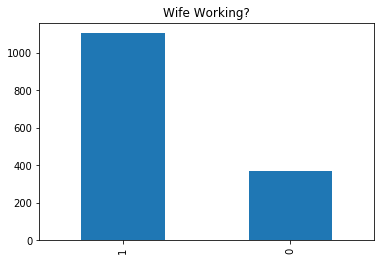

In [10]:
#6 Wife Working Now?
print("Number of women in each group:")
print("0 = Working")
print(len(cmc[cmc['Wife_Working']==0])/1473.0 * 100)
print("1 = Not Working")
print(len(cmc[cmc['Wife_Working']==1])/1473.0 * 100)
cmc['Wife_Working'].value_counts().plot(kind='bar')
plt.title("Wife Working?")
plt.show()

Percentage of husbands in each group:
Group 1
29.5994568907
Group 2
28.8526816022
Group 3
39.7148676171
Group 4
1.83299389002


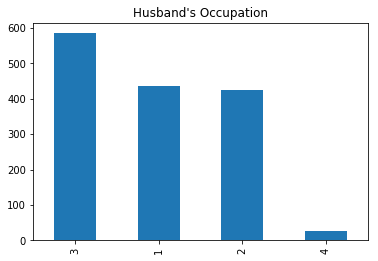

In [11]:
#7 Husband's Occupation
print("Percentage of husbands in each group:")
print("Group 1")
print(len(cmc[cmc['Husband_Occupation']==1])/1473.0 * 100)
print("Group 2")
print(len(cmc[cmc['Husband_Occupation']==2])/1473.0 * 100)
print("Group 3")
print(len(cmc[cmc['Husband_Occupation']==3])/1473.0 * 100)
print("Group 4")
print(len(cmc[cmc['Husband_Occupation']==4])/1473.0 * 100)
cmc['Husband_Occupation'].value_counts().plot(kind='bar')
plt.title("Husband's Occupation")
plt.show()

Percentage of women in each group:
Group 1
8.75763747454
Group 2
15.5465037339
Group 3
29.2600135777
Group 4
46.4358452138


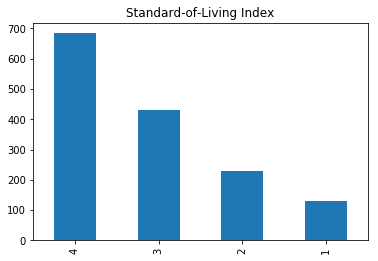

In [12]:
#8 Standard-of-Living Index
print("Percentage of women in each group:")
print("Group 1")
print(len(cmc[cmc['Standard_of_Living']==1])/1473.0 * 100)
print("Group 2")
print(len(cmc[cmc['Standard_of_Living']==2])/1473.0 * 100)
print("Group 3")
print(len(cmc[cmc['Standard_of_Living']==3])/1473.0 * 100)
print("Group 4")
print(len(cmc[cmc['Standard_of_Living']==4])/1473.0 * 100)
cmc['Standard_of_Living'].value_counts().plot(kind='bar')
plt.title("Standard-of-Living Index")
plt.show()

Percentage of women in each group:
Good
92.6001357773
Not Good
7.39986422267


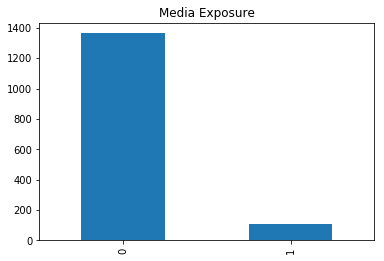

In [13]:
#9 Media Exposure
print("Percentage of women in each group:")
print("Good")
print(len(cmc[cmc['Media_Exposure']==0])/1473.0 * 100)
print("Not Good")
print(len(cmc[cmc['Media_Exposure']==1])/1473.0 * 100)
cmc['Media_Exposure'].value_counts().plot(kind='bar')
plt.title("Media Exposure")
plt.show()

Percentage of women in each group:
1 = No Contraceptive
42.7019687712
2 = Long Term Contraceptive
22.6069246436
3 = Short Term Contraceptive
34.6911065852


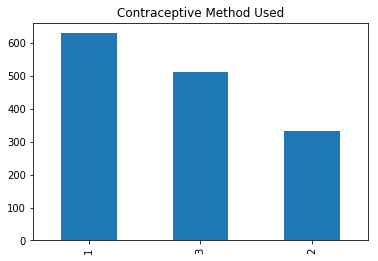

In [14]:
#10 Contraceptive Method Used
print("Percentage of women in each group:")
print("1 = No Contraceptive")
print(len(cmc[cmc['Contraceptive_Method']==1])/1473.0 * 100)
print("2 = Long Term Contraceptive")
print(len(cmc[cmc['Contraceptive_Method']==2])/1473.0 * 100)
print("3 = Short Term Contraceptive")
print(len(cmc[cmc['Contraceptive_Method']==3])/1473.0 * 100)
cmc['Contraceptive_Method'].value_counts().plot(kind='bar')
plt.title("Contraceptive Method Used")
plt.show()

#Task 2.2

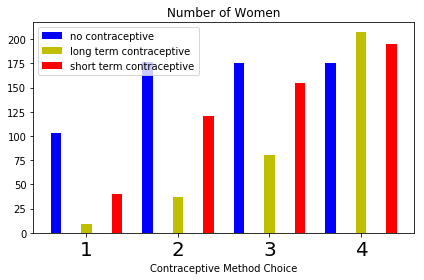

In [15]:
#Pair 1 
none_c = cmc[cmc['Contraceptive_Method']==1].groupby('Wife_Education')['Wife_Education'].count()
long_c = cmc[cmc['Contraceptive_Method']==2].groupby('Wife_Education')['Wife_Education'].count()
short_c = cmc[cmc['Contraceptive_Method']==3].groupby('Wife_Education')['Wife_Education'].count()
fig = plt.figure()
ax = fig.add_subplot(111)
index = [1,4,7,10]
index1 = [2,5,8,11]
index2 = [3,6,9,12]
bar_width = 0.35
rect1 = ax.bar(index,none_c,bar_width,color='blue',label='no contraceptive')
rect2 = ax.bar(index1, long_c,bar_width,color='y',label='long term contraceptive')
rect2 = ax.bar(index2, short_c,bar_width,color='red',label='short term contraceptive')
ax.set_xlabel('Contraceptive Method Choice')
xTickMarks = none_c.index.values.tolist()
ax.set_xticks(index1)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
ax.set_title('Number of Women')
plt.legend()
plt.tight_layout()
plt.show()


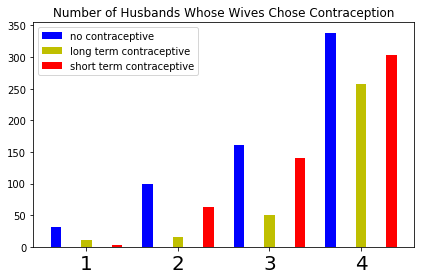

In [16]:
#Pair 2 
none_c = cmc[cmc['Contraceptive_Method']==1].groupby('Husband_Education')['Husband_Education'].count()
long_c = cmc[cmc['Contraceptive_Method']==2].groupby('Husband_Education')['Husband_Education'].count()
short_c = cmc[cmc['Contraceptive_Method']==3].groupby('Husband_Education')['Husband_Education'].count()
fig = plt.figure()
ax = fig.add_subplot(111)
index = [1,4,7,10]
index1 = [2,5,8,11]
index2 = [3,6,9,12]
bar_width = 0.35
rect1 = ax.bar(index,none_c,bar_width,color='blue',label='no contraceptive')
rect2 = ax.bar(index1, long_c,bar_width,color='y',label='long term contraceptive')
rect2 = ax.bar(index2, short_c,bar_width,color='red',label='short term contraceptive')
xTickMarks = none_c.index.values.tolist()
ax.set_xticks(index1)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
ax.set_title('Number of Husbands Whose Wives Chose Contraception')
plt.legend()
plt.tight_layout()
plt.show()

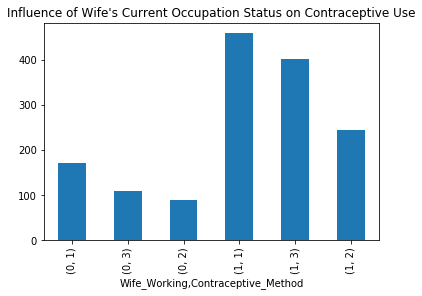

In [17]:
#Pair 3
cmc.groupby('Wife_Working')['Contraceptive_Method'].value_counts().plot(kind='bar')
plt.title("Influence of Wife's Current Occupation Status on Contraceptive Use")
plt.show()

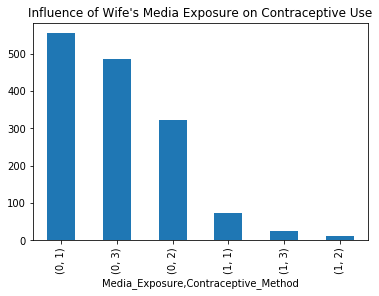

In [18]:
#Pair 4 
cmc.groupby('Media_Exposure')['Contraceptive_Method'].value_counts().plot(kind='bar')
plt.title("Influence of Wife's Media Exposure on Contraceptive Use")
plt.show()

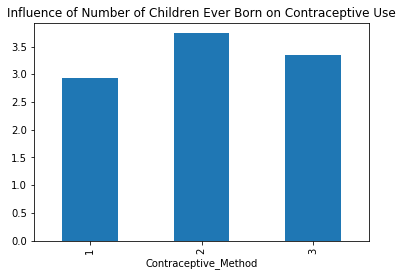

In [19]:
#Pair 5 
cmc.groupby('Contraceptive_Method')['Number_Of_Children'].mean().plot(kind='bar')
plt.title("Influence of Number of Children Ever Born on Contraceptive Use")
plt.show()

#Task 2.3 


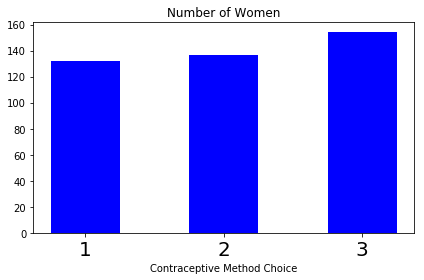

In [20]:
a = cmc[(cmc['Number_Of_Children']>3) & (cmc['Standard_of_Living']>2)].groupby('Contraceptive_Method')['Contraceptive_Method'].count()
fig = plt.figure()
ax = fig.add_subplot(111)
rect1 = ax.bar(a.index.values.tolist(),a,color='blue',width=0.5)
ax.set_title('Number of Women')
xTickMarks = a.index.values.tolist()
ax.set_xticks(a.index.values.tolist())
ax.set_xlabel('Contraceptive Method Choice')
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.tight_layout()
plt.show()

#Task 3


In [21]:
cmc_all = cmc.drop(columns='Contraceptive_Method')
target = cmc['Contraceptive_Method']

In [22]:
cmc_all = pd.get_dummies(cmc_all)
cmc_all.columns
cmc_all

,Wife_Age,Wife_Education,Husband_Education,Number_Of_Children,Wife_Religion,Wife_Working,Husband_Occupation,Standard_of_Living,Media_Exposure
0,24,2,3,3,1,1,2,3,0
1,45,1,3,10,1,1,3,4,0
2,43,2,3,7,1,1,3,4,0
3,42,3,2,9,1,1,3,3,0
4,36,3,3,8,1,1,3,2,0
5,19,4,4,0,1,1,3,3,0
6,38,2,3,6,1,1,3,2,0
7,21,3,3,1,1,0,3,2,0
8,27,2,3,3,1,1,3,4,0
9,45,1,1,8,1,1,2,2,1


In [23]:
cmc_all.shape

(1473, 9)

In [24]:
target.value_counts()

1    629
3    511
2    333
Name: Contraceptive_Method, dtype: int64

In [25]:
X=cmc_all
Y=target

#Task 3.1 and #Task 3.2

Suite1: 50% for training and 50% for testing

In [26]:
X_train_50, X_test_50, Y_train_50, Y_test_50 = train_test_split(X, Y, test_size=0.50, random_state=0)

K-NN

In [27]:
kValues = [5, 10, 15, 20]
for eachK in kValues:
    # Training
    eachModel = KNeighborsClassifier(n_neighbors=eachK)
    eachModel.fit(X_train_50, Y_train_50)
    # Testing
    print('-'*20)
    print('k =', eachK)
    eachPred = eachModel.predict(X_test_50)
    print('Confusion matrix: ')
    print(confusion_matrix(Y_test_50, eachPred))
    print('Accuracy: %.2f' % accuracy_score(Y_test_50, eachPred))
    print('-'*20)
    print('Classification Report:')
    print(classification_report(Y_test_50,eachPred))

--------------------
('k =', 5)
Confusion matrix: 
[[185  46  79]
 [ 69  70  37]
 [ 94  61  96]]
Accuracy: 0.48
--------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.60      0.56       310
           2       0.40      0.40      0.40       176
           3       0.45      0.38      0.41       251

   micro avg       0.48      0.48      0.48       737
   macro avg       0.46      0.46      0.46       737
weighted avg       0.47      0.48      0.47       737

--------------------
('k =', 10)
Confusion matrix: 
[[185  34  91]
 [ 58  75  43]
 [ 76  58 117]]
Accuracy: 0.51
--------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.60      0.59       310
           2       0.45      0.43      0.44       176
           3       0.47      0.47      0.47       251

   micro avg       0.51      0.51      0.51       737
   macro avg       0.50      0.50 

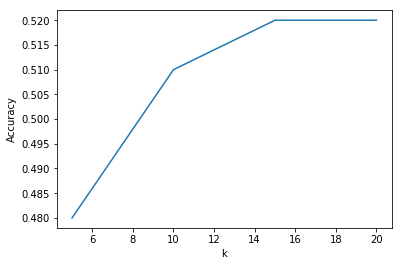

In [28]:
plt.plot([5, 10, 15, 20], [0.48, 0.51, 0.52, 0.52])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

DecisionTree

In [29]:
dt = DecisionTreeClassifier()
dt_trained=dt.fit(X_train_50, Y_train_50)
Y_pred_50 = dt_trained.predict(X_test_50)
print(accuracy_score(Y_test_50, Y_pred_50))
print(confusion_matrix(Y_test_50, Y_pred_50))
print(classification_report(Y_test_50,Y_pred_50))

0.47761194029850745
[[187  50  73]
 [ 53  67  56]
 [ 92  61  98]]
              precision    recall  f1-score   support

           1       0.56      0.60      0.58       310
           2       0.38      0.38      0.38       176
           3       0.43      0.39      0.41       251

   micro avg       0.48      0.48      0.48       737
   macro avg       0.46      0.46      0.46       737
weighted avg       0.47      0.48      0.48       737



In [30]:
depths = range(5,15)
cv_scores = []
for maxDpt in depths:
    dt = DecisionTreeClassifier(max_depth = maxDpt)
    scores = cross_val_score(dt,X_train_50,Y_train_50,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
maxDpt_best = depths[np.argmax(cv_scores)]
dt = DecisionTreeClassifier(max_depth = maxDpt_best)
dt_trained=dt.fit(X_train_50, Y_train_50)
Y_pred_50 = dt_trained.predict(X_test_50)
print(accuracy_score(Y_test_50, Y_pred_50))
print(confusion_matrix(Y_test_50, Y_pred_50))
print(classification_report(Y_test_50,Y_pred_50))

0.5373134328358209
[[181  16 113]
 [ 38  46  92]
 [ 62  20 169]]
              precision    recall  f1-score   support

           1       0.64      0.58      0.61       310
           2       0.56      0.26      0.36       176
           3       0.45      0.67      0.54       251

   micro avg       0.54      0.54      0.54       737
   macro avg       0.55      0.51      0.50       737
weighted avg       0.56      0.54      0.53       737



Suite2: 60% for training and 40% for testing

In [31]:
X_train_60, X_test_40, Y_train_60, Y_test_40 = train_test_split(X, Y, test_size=0.40, random_state=0)

K-NN

In [32]:
kValues = [5, 10, 15, 20]
for eachK in kValues:
    # Training
    eachModel = KNeighborsClassifier(n_neighbors=eachK)
    eachModel.fit(X_train_60, Y_train_60)
    # Testing
    print('-'*20)
    print('k =', eachK)
    eachPred = eachModel.predict(X_test_40)
    print('Confusion matrix: ')
    print(confusion_matrix(Y_test_40, eachPred))
    print('Accuracy: %.2f' % accuracy_score(Y_test_40, eachPred))
    print('-'*20)
    print('Classification Report:')
    print(classification_report(Y_test_40,eachPred))

--------------------
('k =', 5)
Confusion matrix: 
[[155  31  56]
 [ 59  51  36]
 [ 81  46  75]]
Accuracy: 0.48
--------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.64      0.58       242
           2       0.40      0.35      0.37       146
           3       0.45      0.37      0.41       202

   micro avg       0.48      0.48      0.48       590
   macro avg       0.46      0.45      0.45       590
weighted avg       0.47      0.48      0.47       590

--------------------
('k =', 10)
Confusion matrix: 
[[156  30  56]
 [ 45  61  40]
 [ 62  47  93]]
Accuracy: 0.53
--------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.64      0.62       242
           2       0.44      0.42      0.43       146
           3       0.49      0.46      0.48       202

   micro avg       0.53      0.53      0.53       590
   macro avg       0.51      0.51 

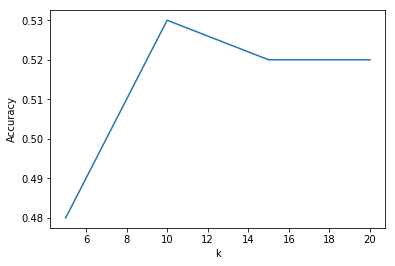

In [33]:
plt.plot([5, 10, 15, 20], [0.48, 0.53, 0.52, 0.52])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

DecisionTree

In [34]:
dt = DecisionTreeClassifier()
dt_trained=dt.fit(X_train_60, Y_train_60)
Y_pred_40 = dt_trained.predict(X_test_40)
print(accuracy_score(Y_test_40, Y_pred_40))
print(confusion_matrix(Y_test_40, Y_pred_40))
print(classification_report(Y_test_40,Y_pred_40))

0.47796610169491527
[[139  45  58]
 [ 38  61  47]
 [ 71  49  82]]
              precision    recall  f1-score   support

           1       0.56      0.57      0.57       242
           2       0.39      0.42      0.41       146
           3       0.44      0.41      0.42       202

   micro avg       0.48      0.48      0.48       590
   macro avg       0.46      0.47      0.46       590
weighted avg       0.48      0.48      0.48       590



In [35]:
depths = range(5,15)
cv_scores = []
for maxDpt in depths:
    dt = DecisionTreeClassifier(max_depth = maxDpt)
    scores = cross_val_score(dt,X_train_60,Y_train_60,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
maxDpt_best = depths[np.argmax(cv_scores)]
dt = DecisionTreeClassifier(max_depth = maxDpt_best)
dt_trained=dt.fit(X_train_60, Y_train_60)
Y_pred_40 = dt_trained.predict(X_test_40)
print(accuracy_score(Y_test_40, Y_pred_40))
print(confusion_matrix(Y_test_40, Y_pred_40))
print(classification_report(Y_test_40,Y_pred_40))

0.511864406779661
[[150  24  68]
 [ 52  56  38]
 [ 72  34  96]]
              precision    recall  f1-score   support

           1       0.55      0.62      0.58       242
           2       0.49      0.38      0.43       146
           3       0.48      0.48      0.48       202

   micro avg       0.51      0.51      0.51       590
   macro avg       0.50      0.49      0.50       590
weighted avg       0.51      0.51      0.51       590



Suite3: 80% for training and 20% for testing

In [36]:
X_train_80, X_test_20, Y_train_80, Y_test_20 = train_test_split(X, Y, test_size=0.20, random_state=0)

K-NN

In [37]:
kValues = [5, 10, 15, 20]
for eachK in kValues:
    # Training
    eachModel = KNeighborsClassifier(n_neighbors=eachK)
    eachModel.fit(X_train_80, Y_train_80)
    # Testing
    print('-'*20)
    print('k =', eachK)
    eachPred = eachModel.predict(X_test_20)
    print('Confusion matrix: ')
    print(confusion_matrix(Y_test_20, eachPred))
    print('Accuracy: %.2f' % accuracy_score(Y_test_20, eachPred))
    print('-'*20)
    print('Classification Report:')
    print(classification_report(Y_test_20,eachPred))

--------------------
('k =', 5)
Confusion matrix: 
[[89 19 29]
 [25 28 22]
 [29 21 33]]
Accuracy: 0.51
--------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.65      0.64       137
           2       0.41      0.37      0.39        75
           3       0.39      0.40      0.40        83

   micro avg       0.51      0.51      0.51       295
   macro avg       0.48      0.47      0.47       295
weighted avg       0.50      0.51      0.51       295

--------------------
('k =', 10)
Confusion matrix: 
[[89 14 34]
 [19 30 26]
 [30 15 38]]
Accuracy: 0.53
--------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.65      0.65       137
           2       0.51      0.40      0.45        75
           3       0.39      0.46      0.42        83

   micro avg       0.53      0.53      0.53       295
   macro avg       0.51      0.50      0.50       29

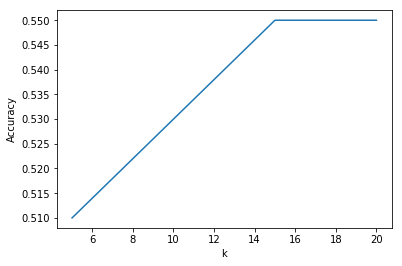

In [38]:
plt.plot([5, 10, 15, 20], [0.51, 0.53, 0.55, 0.55])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

DecisionTree

In [39]:
dt = DecisionTreeClassifier()
dt_trained=dt.fit(X_train_80, Y_train_80)
Y_pred_20 = dt_trained.predict(X_test_20)
print(accuracy_score(Y_test_20, Y_pred_20))
print(confusion_matrix(Y_test_20, Y_pred_20))
print(classification_report(Y_test_20,Y_pred_20))

0.44745762711864406
[[78 27 32]
 [18 26 31]
 [33 22 28]]
              precision    recall  f1-score   support

           1       0.60      0.57      0.59       137
           2       0.35      0.35      0.35        75
           3       0.31      0.34      0.32        83

   micro avg       0.45      0.45      0.45       295
   macro avg       0.42      0.42      0.42       295
weighted avg       0.46      0.45      0.45       295



In [40]:
from sklearn.model_selection import cross_val_score
depths = range(5,15)
cv_scores = []
for maxDpt in depths:
    dt = DecisionTreeClassifier(max_depth = maxDpt)
    scores = cross_val_score(dt,X_train_80,Y_train_80,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
maxDpt_best = depths[np.argmax(cv_scores)]
dt = DecisionTreeClassifier(max_depth = maxDpt_best)
dt_trained=dt.fit(X_train_80, Y_train_80)
Y_pred_20 = dt_trained.predict(X_test_20)
print(accuracy_score(Y_test_20, Y_pred_20))
print(confusion_matrix(Y_test_20, Y_pred_20))
print(classification_report(Y_test_20,Y_pred_20))

0.5288135593220339
[[87 14 36]
 [13 29 33]
 [27 16 40]]
              precision    recall  f1-score   support

           1       0.69      0.64      0.66       137
           2       0.49      0.39      0.43        75
           3       0.37      0.48      0.42        83

   micro avg       0.53      0.53      0.53       295
   macro avg       0.51      0.50      0.50       295
weighted avg       0.55      0.53      0.53       295

